<a href="https://colab.research.google.com/github/SamhithaDRao/AI_LAB/blob/main/Copy_of_Pneumonia_modal_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import seaborn as sn
import os
import cv2 as cv
from tqdm.notebook import tqdm

In [ ]:
train_normal_path = "/content/drive/MyDrive/Pneumonia/chest_xray/train/NORMAL"
train_pneumonia_path = "/content/drive/MyDrive/Pneumonia/chest_xray/train/PNEUMONIA"
test_normal_path = "/content/drive/MyDrive/Pneumonia/chest_xray/test/NORMAL"
test_pneumonia_path = "/content/drive/MyDrive/Pneumonia/chest_xray/test/PNEUMONIA"

train_normal_lst = []
train_pneumonia_lst = []
test_normal_lst = []
test_pneumonia_lst = []

train_normal_len = len(os.listdir(train_normal_path))
train_pneumonia_len = len(os.listdir(train_pneumonia_path))
test_normal_len = len(os.listdir(test_normal_path))
test_pneumonia_len = len(os.listdir(test_pneumonia_path))
train_normal_len,train_pneumonia_len,test_normal_len,test_pneumonia_len

(1341, 3930, 241, 390)

In [ ]:
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
for pics in tqdm(os.listdir(train_normal_path)):
    if count_1 <= train_normal_len:
        img = cv.imread(os.path.join(train_normal_path,pics))
        img = cv.resize(img,(27,27),cv.INTER_LINEAR)
        img = img / 255
        count_1 = count_1 + 1
        train_normal_lst.append(img)
for pics in tqdm(os.listdir(train_pneumonia_path)):
    if count_2 < train_normal_len:
        img = cv.imread(os.path.join(train_pneumonia_path,pics))
        img = cv.resize(img,(27,27),cv.INTER_LINEAR)
        img = img / 255
        count_2 = count_2 + 1
        train_pneumonia_lst.append(img)
for pics in tqdm(os.listdir(test_normal_path)):
    if count_3 <= test_normal_len:
        img = cv.imread(os.path.join(test_normal_path,pics))
        img = cv.resize(img,(27,27),cv.INTER_LINEAR)
        img = img / 255
        count_3 = count_3 + 1
        test_normal_lst.append(img)
for pics in tqdm(os.listdir(test_pneumonia_path)):
    if count_4 < test_normal_len:
        img = cv.imread(os.path.join(test_pneumonia_path,pics))
        img = cv.resize(img,(27,27),cv.INTER_LINEAR)
        img = img / 255
        count_4 = count_4 + 1
        test_pneumonia_lst.append(img)
train_normal_np = np.array(train_normal_lst)
train_pneumonia_np = np.array(train_pneumonia_lst)
test_normal_np = np.array(test_normal_lst)
test_pneumonia_np = np.array(test_pneumonia_lst)

train_normal_np.shape , train_pneumonia_np.shape ,  test_normal_np.shape , test_pneumonia_np.shape

  0%|          | 0/1341 [00:00<?, ?it/s]

  0%|          | 0/3930 [00:00<?, ?it/s]

  0%|          | 0/241 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

((1341, 27, 27, 3), (1341, 27, 27, 3), (241, 27, 27, 3), (241, 27, 27, 3))

In [ ]:
np.save("/content/drive/MyDrive/Pneumonia/train_normal_np.npy",train_normal_np)
np.save("/content/drive/MyDrive/Pneumonia/train_pneumonia_np.npy",train_pneumonia_np)
np.save("/content/drive/MyDrive/Pneumonia/test_normal_np.npy",test_normal_np)
np.save("/content/drive/MyDrive/Pneumonia/test_pneumonia_np.npy",test_pneumonia_np)

In [ ]:
train_normal_np = np.load("/content/drive/MyDrive/Pneumonia/train_normal_np.npy")
train_pneumonia_np = np.load("/content/drive/MyDrive/Pneumonia/train_pneumonia_np.npy")
test_normal_np = np.load("/content/drive/MyDrive/Pneumonia/test_normal_np.npy")
test_pneumonia_np = np.load("/content/drive/MyDrive/Pneumonia/test_pneumonia_np.npy")

In [ ]:
train_normal_np.shape , train_pneumonia_np.shape ,  test_normal_np.shape , test_pneumonia_np.shape

((1341, 27, 27, 3), (1341, 27, 27, 3), (241, 27, 27, 3), (241, 27, 27, 3))

In [ ]:
dict_label = {0:"NORMAL",
             1:"PNEUMONIA"}
train_normal_label = np.ones(train_normal_np.shape[0]) * 0
train_pneumonia_label = np.ones(train_pneumonia_np.shape[0]) * 1
test_normal_label = np.ones(test_normal_np.shape[0]) * 0
test_pneumonia_label = np.ones(test_pneumonia_np.shape[0]) * 1

In [ ]:
train_normal_label.shape , train_pneumonia_label.shape , test_normal_label.shape , test_pneumonia_label.shape

((1341,), (1341,), (241,), (241,))

In [ ]:
x_train = np.concatenate((train_normal_np,train_pneumonia_np),axis=0)
x_test = np.concatenate((test_normal_np,test_pneumonia_np),axis=0)
y_train = np.concatenate((train_normal_label,train_pneumonia_label),axis=0)
y_test = np.concatenate((test_normal_label,test_pneumonia_label),axis=0)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((2682, 27, 27, 3), (482, 27, 27, 3), (2682,), (482,))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(.7),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dropout(.7),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",loss=tf.keras.losses.binary_crossentropy,metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=6)

Epoch 1/6
84/84 [==============================] - 3s 18ms/step - loss: 0.6920 - accuracy: 0.5175
Epoch 2/6
84/84 [==============================] - 2s 21ms/step - loss: 0.6620 - accuracy: 0.6197
Epoch 3/6
84/84 [==============================] - 3s 30ms/step - loss: 0.5355 - accuracy: 0.8281
Epoch 4/6
84/84 [==============================] - 2s 21ms/step - loss: 0.4234 - accuracy: 0.8915
Epoch 5/6
84/84 [==============================] - 1s 17ms/step - loss: 0.2903 - accuracy: 0.9310
Epoch 6/6
84/84 [==============================] - 1s 17ms/step - loss: 0.2248 - accuracy: 0.9430


In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
model.save("/content/drive/MyDrive/Pneumonia/pneumonia.h5",model)

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 25, 25, 16)        448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 1, 1, 64)        

In [ ]:
y_predicted = model.predict(x_test)
y_predicted = np.resize(y_predicted,y_predicted.shape[0])
y_predicted = np.round(y_predicted)

16/16 [==============================] - 0s 5ms/step


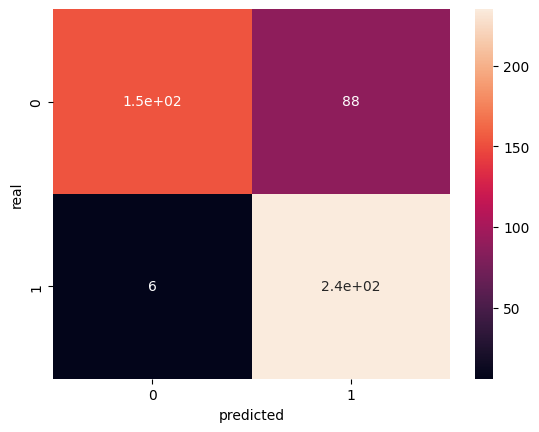

In [ ]:
cf_matrix = confusion_matrix(y_test,y_predicted)
sn.heatmap(cf_matrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("real")
plt.show()
